## Deepak
## Data Science ( 1st June )

**Create a machine learning model which will help the company in determining the salary of newly hired employees using the given data. I will also show the prediction on demo data, using best model at the end.** 

# Data importing :

In [1]:
# Importing all required libraries

import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn import preprocessing

In [2]:
# Loading all the data , by using pandas pd.read function

df = pd.read_csv('E:/Data Science with python/Python - machine learning/Project/ML case Study.csv', header=0)
college = pd.read_csv('E:/Data Science with python/Python - machine learning/Project/colleges.csv', header=0)
cities = pd.read_csv('E:/Data Science with python/Python - machine learning/Project/cities.csv', header=0)

In [3]:
# First five rows of main dataframe (df) to analyze

df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [4]:
# Storing data into Tier1, Tier2, Tier3 that are lists, using tolist function from collage dataframe.

Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()

In [5]:
# Replacing main dataframe that is df's "college" column values with list category Tier1,Tier2,Tier3

for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace=True)
    

In [6]:
# Checking if the values of collage is replaced with tier1 that is 1, tier2 that is 1, tier3 that is 1 or not. 

df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523,3,66,19,71406.58
1,2,Ajmer,Executive,57081,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,3,Ajmer,Executive,49010,2,81,33,82092.39
4,1,Durgapur,Executive,57879,4,74,32,73878.10


In [7]:
# First five rows of cities dataframe

cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [8]:
# Storing data into metro, non_metro that are lists, using tolist function from cities dataframe.

metro = cities["Metrio City"].tolist()
non_metro = cities["non-metro cities"].tolist()

In [9]:
# Replacing main dataframe that is df's "cities" column values with list category metro and non_metro

for item in df.City:
    if item in metro:
        df["City"].replace(item,1,inplace=True)
    elif item in non_metro:
        df["City"].replace(item,0,inplace=True)

In [10]:
# Checking if the values of cities is replaced with metro that is 1, non-metro that is 0 or not. 

df.head(10)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523,3,66,19,71406.58
1,2,0,Executive,57081,1,84,18,68005.87
2,3,0,Executive,60347,2,52,28,76764.02
3,3,0,Executive,49010,2,81,33,82092.39
4,1,0,Executive,57879,4,74,32,73878.10
5,2,0,Executive,54340,4,73,31,59950.89
6,3,1,Executive,60298,1,42,46,66602.34
7,2,1,Executive,49944,2,56,37,57768.44
8,3,1,Executive,53124,4,40,37,70083.30
9,1,0,Executive,51141,1,47,60,85648.48


--------------------------------------------------------------------------------------------------------------------------------

# Data pre-processing :

* ### Missing value imputation

In [11]:
# Checking quick summary of dataframe df in order to find any missing values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   int64  
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 99.4+ KB


#### Observation
There is no missing values so, we don't have need to do missing value imputation.

* ### Dummy variable creation

In [12]:
# Getting dummy variables (in the form of 0 and 1) for our all categorical columns / variables.

df = pd.get_dummies(df)

In [13]:
# Checking of the categorical variable is changed into dummy variable or not.

df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,0,55523,3,66,19,71406.58,False,True
1,2,0,57081,1,84,18,68005.87,True,False
2,3,0,60347,2,52,28,76764.02,True,False
3,3,0,49010,2,81,33,82092.39,True,False
4,1,0,57879,4,74,32,73878.10,True,False


Dummy variable is created but not in the form of int value 0 and 1

In [14]:
# Converting created dummy variable values into integer.

df = df.astype({"Role_Executive" : "int", "Role_Manager" : "int"})

In [15]:
# Checking dummy variables are converted into int or not

df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,0,55523,3,66,19,71406.58,0,1
1,2,0,57081,1,84,18,68005.87,1,0
2,3,0,60347,2,52,28,76764.02,1,0
3,3,0,49010,2,81,33,82092.39,1,0
4,1,0,57879,4,74,32,73878.10,1,0


The dummy variables are converted successfully

* ### Correlation

In [16]:
# Checking correlation between independent and dependent to check tendency between them.
# Checking correrlation between two independent variables to remove unneccessary variable (if value > 0.8)

df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,0.014749,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,0.048671,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,-0.012321,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,0.017150,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,-0.017858,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,0.026751,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,-0.621311,0.621311
Role_Executive,0.014749,0.048671,-0.012321,0.017150,-0.017858,0.026751,-0.621311,1.000000,-1.000000
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,-1.000000,1.000000


There is no independent variables which contain value more than 0.8

* ### Outlier Treatment :

In [17]:
# Getting EDD (Extended data Dictionay) of data to find any outliers in data

df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.793581,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,1.000000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000


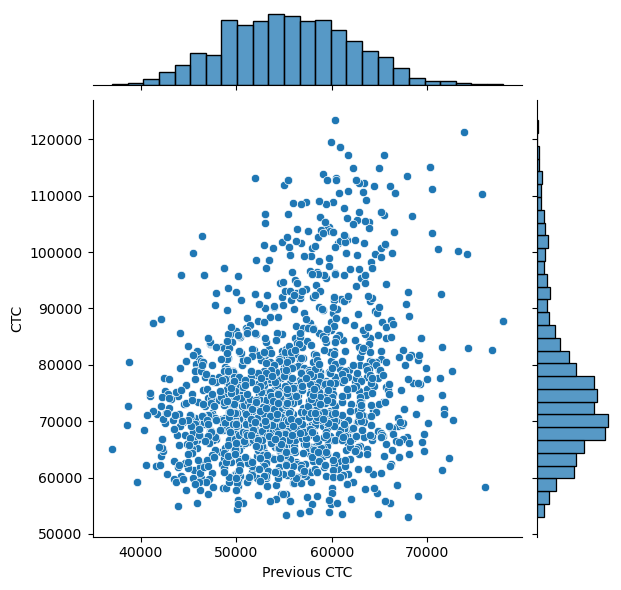

In [18]:
# Checking outlier using jointplot between independent ("Previous CTC") and dependent variable that is "CTC".

sns.jointplot(x = "Previous CTC", y = "CTC", data = df)

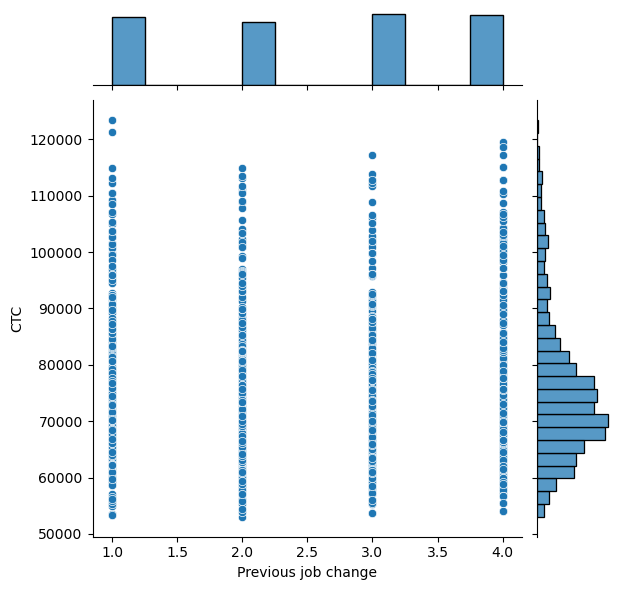

In [19]:
# Checking outlier using jointplot between independent ("Previous job change") and dependent variable that is "CTC".

sns.jointplot(x = "Previous job change", y = "CTC", data = df)

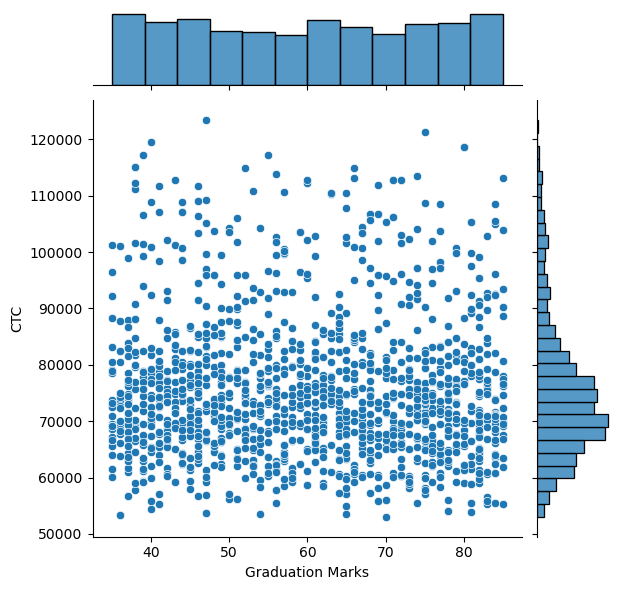

In [20]:
# Checking outlier using jointplot between independent ("Graduation Marks") and dependent variable that is "CTC".

sns.jointplot(x = "Graduation Marks", y = "CTC", data = df)

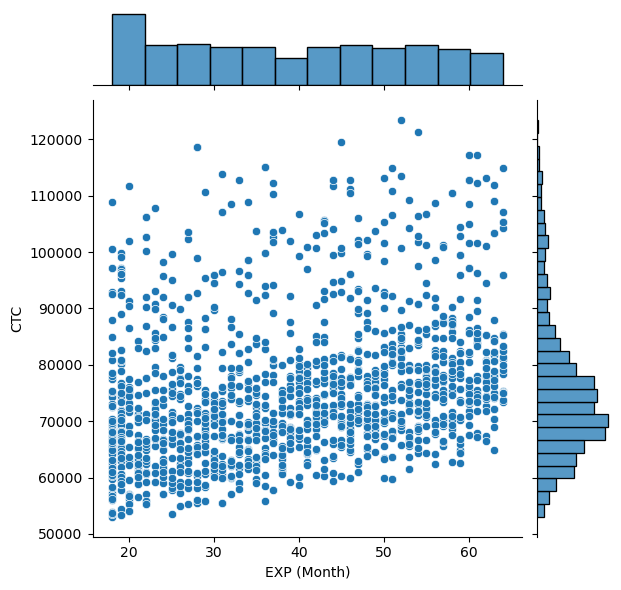

In [21]:
# Checking outlier using jointplot between independent ("EXP (Month)") and dependent variable that is "CTC".

sns.jointplot(x = "EXP (Month)", y = "CTC", data = df)

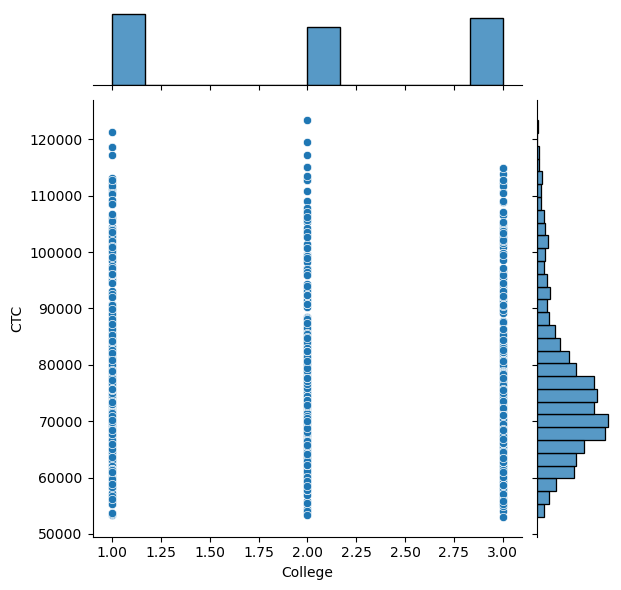

In [22]:
# Checking outlier using jointplot between independent ("College") and dependent variable that is "CTC".

sns.jointplot(x = "College", y = "CTC", data = df)

#### Observation :

* Did not found any outlier between dependent and independent variables.
* There is no data points that is far away from the exact data points.
* By analyzing EDD there is no difference between mean and median for each attributes.
* Also by analyzing EDD there is no huge difference between min to 25% and 75% to maximum.

--------------------------------------------------------------------------------------------------------------------------------

# Data spliting - dependent and independent

In [23]:
# Splitting data into X and Y variable independent and dependent respectively.

X = df.loc[:, df.columns != "CTC"]
Y = df["CTC"]

In [24]:
# First five rows of independent variable X

X.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Executive,Role_Manager
0,2,0,55523,3,66,19,0,1
1,2,0,57081,1,84,18,1,0
2,3,0,60347,2,52,28,1,0
3,3,0,49010,2,81,33,1,0
4,1,0,57879,4,74,32,1,0


In [25]:
# First five rows of Dependent variable Y

Y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------

# Model Selection

**Selecting regression models that are acceptable for predicting salary based on the input features. There are choices like, such as Linear Regression, Ridge regresson, Lasso Regression, KNN, Random forest Regression, Gradient boosting and XG Boosting regression.**

* ## Simple linear regression

In [26]:
# Importing regresson statsmodel 

import statsmodels.api as sm

In [27]:
# Creating constant variable for X

X_cons = sm.add_constant(X)

In [28]:
# Fitting the model with X_cons and Y

lm = sm.OLS(Y, X_cons).fit()

In [29]:
# Getting the summary of the model

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          4.70e-257
Time:                        02:04:43   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.211e+04   1463.780     21.936      0.000    2.92e+04     3.5e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                  380.8308    433.455      0.879      0.380    -469.377    1231.039
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Executive       6311.2273    760.861      8.295      0.000    4818.825    7803.630
Role_Manager          2.58e+04    797.098     32.366      0.000    2.42e+04    2.74e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.87e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Model Interpretation / evaluation

* An R-squared value of 0.534 indicates that model explains a moderate amount of the variance in the dependent variable.
* The adjusted R-squared value of 0.532 suggests that while the model explains a similar amount of variance, it may benefit from simplification if have included unnecessary predictors.
* Our model has a highly significant F-statistic, which supports the idea that at least one of the independent variables in model is contributing significantly to explaining the variance in the dependent variable. 

--------------------------------------------------------------------------------------------------------------------------------

* ## Linear Regression

In [30]:
# Splitting data into train and test dataset

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [31]:
# Creating model object

lm2 = LinearRegression()

In [32]:
# Fitting our model over train data set

lm2.fit(X_train, Y_train)

LinearRegression()

In [33]:
# Printing values of intercept and coefficient

print(lm2.intercept_, lm2.coef_)

48530.60802986835 [-5.17509158e+02  4.82800374e+02  4.22242899e-01  8.74331790e+00
  1.94023127e+00  2.43718541e+02 -9.30104190e+03  9.30104190e+03]


#### Model Accuracy

In [34]:
# Calcualting model accuracy for test and train data

print('r2 score of test set: ', r2_score(Y_test, lm2.predict(X_test)))
print('r2 score of train set: ', r2_score(Y_train, lm2.predict(X_train)))
print('MSE of test set', mean_squared_error(Y_test, lm2.predict(X_test)))

r2 score of test set:  0.5933517958385074
r2 score of train set:  0.5137747142134839
MSE of test set 77362774.94956572


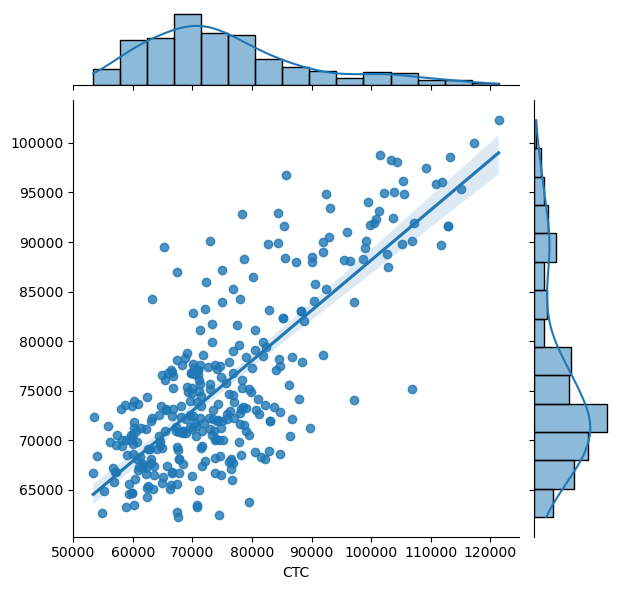

In [35]:
# Joint plot of predicted and the true value

sns.jointplot(x = Y_test, y = lm2.predict(X_test), kind = "reg")

#### Model Interpretation / evaluation

* Our model has a training MSE of 73096299.02751341, which suggests that it fits the training data reasonably well.
* The test MSE of 77362774.94956572 indicates how well model generalizes to new data. It's slightly higher than the training MSE, which is expected.
* A test R-squared score of 0.59 indicates that our linear regression model explains approximately 59% of the variance in the dependent variable (the variable we're trying to predict) for the test data.

--------------------------------------------------------------------------------------------------------------------------------

* ## Ridge Regression

In [36]:
# Creating scaler object which will store the scaling information of our X train variable

scaler = preprocessing.StandardScaler().fit(X_train)

In [37]:
# Transform our X_train into X_train_scale

X_train_s = scaler.transform(X_train)

In [38]:
# Transform our X_test into X_test_scale

X_test_s = scaler.transform(X_test)

In [39]:
# Creating ridge regresson model object

lm_rid = Ridge(alpha = 0.5)

In [40]:
# Fitting our model over train data set

lm_rid.fit(X_train_s, Y_train)

Ridge(alpha=0.5)

In [41]:
# Calcualting model accuracy for test and train data

print('r2 score of test set: ', r2_score(Y_test, lm_rid.predict(X_test_s)))
print('r2 score of train set: ', r2_score(Y_train, lm_rid.predict(X_train_s)))
print('MSE of test set: ', mean_squared_error(Y_test, lm_rid.predict(X_test_s)))

r2 score of test set:  0.5933113651558912
r2 score of train set:  0.5137746805678054
MSE of test set:  77370466.68352221


#### Model Interpretation / evaluation

* The model may be reasonably generalizing to fresh, untested data if the Test R-squared value is higher than the Train R-squared value. This is a good indicator since it shows that the model is not seriously overfit to the training set of data.

* With a test R-squared of 0.5933, the model successfully accounts for a sizable percentage of the variation in the test data. It suggests that the dependent variable, CTC, may be somewhat predicted by the Ridge Regression model.

* A modest Train R-squared of 0.5137 indicates that the model has some capacity to explain the training set of data.


* ### Ridge pregression - Validation curve

In [42]:
# Importing validation curve from sklearn

from sklearn.model_selection import validation_curve

In [43]:
# Creating param range for alpha using numpy array function

param_range = np.logspace(-2,8,100)

In [44]:
# Printing all potential alpha values

param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [45]:
# Calculating validation curve on train data set

train_scores, test_scores = validation_curve(estimator = lm_rid, # model on which we want to do validation curve
                                             X = X_train_s, # X feature which is our X_train_scaled in our case
                                             y = Y_train, # Y feature which is our Y_train in our case
                                             param_name = "alpha", # parameter name on which values we want to do validation curve
                                             param_range = param_range, # value of all alpha, which is stored in param_Range
                                             scoring = "r2") # want to calculate r2 score

In [46]:
# Printing the result of both objects of validation curve

print(train_scores)
print(test_scores)

[[5.10979008e-01 5.36437285e-01 4.99879242e-01 5.14327357e-01
  5.09289503e-01]
 [5.10979008e-01 5.36437285e-01 4.99879242e-01 5.14327357e-01
  5.09289503e-01]
 [5.10979008e-01 5.36437285e-01 4.99879242e-01 5.14327357e-01
  5.09289503e-01]
 [5.10979008e-01 5.36437285e-01 4.99879242e-01 5.14327357e-01
  5.09289503e-01]
 [5.10979008e-01 5.36437285e-01 4.99879242e-01 5.14327357e-01
  5.09289502e-01]
 [5.10979008e-01 5.36437285e-01 4.99879242e-01 5.14327357e-01
  5.09289502e-01]
 [5.10979008e-01 5.36437285e-01 4.99879242e-01 5.14327357e-01
  5.09289502e-01]
 [5.10979007e-01 5.36437284e-01 4.99879242e-01 5.14327356e-01
  5.09289502e-01]
 [5.10979007e-01 5.36437284e-01 4.99879241e-01 5.14327356e-01
  5.09289502e-01]
 [5.10979006e-01 5.36437284e-01 4.99879241e-01 5.14327356e-01
  5.09289501e-01]
 [5.10979006e-01 5.36437283e-01 4.99879240e-01 5.14327355e-01
  5.09289500e-01]
 [5.10979004e-01 5.36437282e-01 4.99879239e-01 5.14327353e-01
  5.09289499e-01]
 [5.10979002e-01 5.36437280e-01 4.998792

In [47]:
# Calculating mean of the values across column

train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)

In [48]:
# printing calculated mean values of r2 across column

In [49]:
train_mean

array([5.14182479e-01, 5.14182479e-01, 5.14182479e-01, 5.14182479e-01,
       5.14182479e-01, 5.14182479e-01, 5.14182479e-01, 5.14182478e-01,
       5.14182478e-01, 5.14182478e-01, 5.14182477e-01, 5.14182475e-01,
       5.14182473e-01, 5.14182470e-01, 5.14182465e-01, 5.14182456e-01,
       5.14182443e-01, 5.14182422e-01, 5.14182388e-01, 5.14182334e-01,
       5.14182248e-01, 5.14182111e-01, 5.14181893e-01, 5.14181547e-01,
       5.14180996e-01, 5.14180119e-01, 5.14178727e-01, 5.14176514e-01,
       5.14173001e-01, 5.14167426e-01, 5.14158588e-01, 5.14144593e-01,
       5.14122464e-01, 5.14087536e-01, 5.14032528e-01, 5.13946141e-01,
       5.13810946e-01, 5.13600283e-01, 5.13273782e-01, 5.12771082e-01,
       5.12003332e-01, 5.10842267e-01, 5.09107111e-01, 5.06550501e-01,
       5.02846073e-01, 4.97582222e-01, 4.90268356e-01, 4.80360680e-01,
       4.67312958e-01, 4.50652561e-01, 4.30073697e-01, 4.05530000e-01,
       3.77301781e-01, 3.46013741e-01, 3.12589330e-01, 2.78146118e-01,
      

In [50]:
test_mean

array([ 5.02941384e-01,  5.02941397e-01,  5.02941413e-01,  5.02941433e-01,
        5.02941459e-01,  5.02941491e-01,  5.02941532e-01,  5.02941584e-01,
        5.02941649e-01,  5.02941731e-01,  5.02941834e-01,  5.02941964e-01,
        5.02942127e-01,  5.02942333e-01,  5.02942591e-01,  5.02942916e-01,
        5.02943322e-01,  5.02943830e-01,  5.02944464e-01,  5.02945252e-01,
        5.02946229e-01,  5.02947432e-01,  5.02948903e-01,  5.02950687e-01,
        5.02952820e-01,  5.02955325e-01,  5.02958191e-01,  5.02961338e-01,
        5.02964568e-01,  5.02967468e-01,  5.02969271e-01,  5.02968621e-01,
        5.02963201e-01,  5.02949154e-01,  5.02920177e-01,  5.02866145e-01,
        5.02771024e-01,  5.02609778e-01,  5.02343901e-01,  5.01915121e-01,
        5.01236875e-01,  5.00183333e-01,  4.98576251e-01,  4.96170847e-01,
        4.92643390e-01,  4.87585015e-01,  4.80508082e-01,  4.70872051e-01,
        4.58134142e-01,  4.41824943e-01,  4.21640722e-01,  3.97534776e-01,
        3.69783465e-01,  

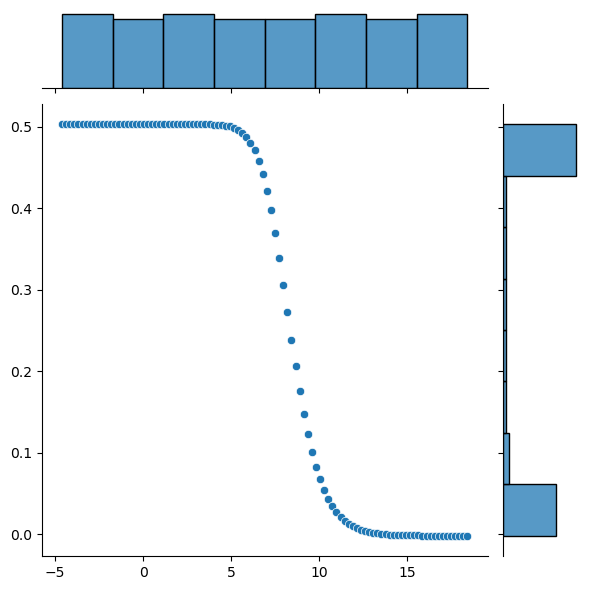

In [51]:
# Visualization of the Validation curve (r2 vs alpha)

sns.jointplot(x = np.log(param_range), y = test_mean)

In [52]:
# Finding the location of max mean test score value

np.where(test_mean == max(test_mean))

(array([30], dtype=int64),)

In [53]:
# Finding the lamda value of thid 30 index

param_range[30]

10.722672220103231

this is the lamda value at which we are getting the max r-squared value.

In [54]:
# Creating Ridge Regression object using best lamda value

lm_rid_best = Ridge(alpha = param_range[30])

In [55]:
# Fitting our best model on training data set

lm_rid_best.fit(X_train_s, Y_train)

Ridge(alpha=10.722672220103231)

In [56]:
# Calcualting model accuracy for test and train data

print('r2_score test set with best alpha value is', r2_score(Y_test, lm_rid_best.predict(X_test_s)))
print('r2_score train set with best alpha value is', r2_score(Y_train, lm_rid_best.predict(X_train_s)))
print('MSE of test set with best alpha value is', mean_squared_error(Y_test, lm_rid_best.predict(X_test_s)))


r2_score test set with best alpha value is 0.5924776982033093
r2_score train set with best alpha value is 0.5137594243529842
MSE of test set with best alpha value is 77529067.62698011


#### Model Interpretation / evaluation

* In general, it is preferable that the Test R2 score be greater than the Train R2 value. It implies that the model is reasonably generalizing to new, unforeseen data.
* Overall, the model's performance shows that it has some predictive potential and is not considerably overfitting to the training data, with R-squared values of 0.5924 (Test) and 0.5137 (Train).

--------------------------------------------------------------------------------------------------------------------------------

* ## Lasso regression

In [57]:
# Creating Ridge Regression model object

lm_lasso = Lasso(alpha = 0.5)

In [58]:
# Fitting our model on Train data set 

lm_lasso.fit(X_train_s, Y_train)

Lasso(alpha=0.5)

In [59]:
# Calcualting model accuracy for test and train data

print('r2_Score of test set :', r2_score(Y_test, lm_lasso.predict(X_test_s)))
print('r2_Score of train set :', r2_score(Y_train, lm_lasso.predict(X_train_s)))
print('MSE of test set :', mean_squared_error(Y_test, lm_lasso.predict(X_test_s)))

r2_Score of test set : 0.5933343840895651
r2_Score of train set : 0.5137747025114026
MSE of test set : 77366087.44720155


#### Model Interpretation / evaluation

* The test data's R2 score is 0.5933, which shows that a sizable proportion of the variation in the test data is captured by the model.

* The model explains a moderate portion of the variation in the training data, according to the R2 score on the train data of 0.5137.

* It is typically preferred that the R2 score for the test data be greater than the R2 value for the train data. It implies that the model is reasonably generalizing to fresh, unforeseen facts.

* The model's predictions appear to be pretty close to the actual values based on the MSE of 77366087.44720155.

--------------------------------------------------------------------------------------------------------------------------------

* ## KNN (K- Nearest Neighbors) Regression

In [60]:
# Creating scaler object which will store the scaling information of our X train

scaler = preprocessing.StandardScaler().fit(X_train)

In [61]:
# Transforming our X_train to our X_train_scaler

X_train_s = scaler.transform(X_train)

In [62]:
# Transforming our X_test to our X_test_scaler

X_test_s = scaler.transform(X_test)

In [63]:
# Importing KNN regressor from sklearn

from sklearn.neighbors import KNeighborsRegressor

In [64]:
# Creating KNN regressor model Object

knn_reg = KNeighborsRegressor(n_neighbors = 3)

In [65]:
# Fitting our KNN model over train data set

knn_reg.fit(X_train_s, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [66]:
# Calcualting model accuracy for test and train data

print('Test set r2 score: ', r2_score(Y_test, knn_reg.predict(X_test_s)))
print('Train set r2 score: ', r2_score(Y_train, knn_reg.predict(X_train_s)))
print('test set MSE: ', mean_squared_error(Y_train, knn_reg.predict(X_train_s)))

Test set r2 score:  0.5314437638443239
Train set r2 score:  0.7195551254349155
test set MSE:  42160461.438740335


#### Model Interpretation / evaluation

* KNN Regression has a Test R-squared Score of 0.53144 and a Train R-squared Score of 0.7195. The Mean Squared Error (MSE) is also 42160461.438740335. Based on these data, the KNN Regression model looks to be overfitting, as the Train R-squared score is greater than the Test R-squared score. This is confirmed further by the relatively high MSE, which indicates that the model's predictions differ considerably from the actual values.

* When the Train R-squared score exceeds the Test R-squared score, it indicates that the model is remembering the training data rather than generalizing effectively to new, unknown data. Because the KNN method is non-parametric, it can be sensitive to the size and distribution of the data points, and it may not be the best choice.

* ### KNN - Using Grid search

In [67]:
# Importing Grid Search model from Sklearn

from sklearn.model_selection import GridSearchCV

In [68]:
# Creating KNN model regressor object

knn_reg2 = KNeighborsRegressor(n_jobs = -1)

In [69]:
# Creating param grid for GridSearchCV function

param_grid = {'n_neighbors' : [1,2,3,5,6,7,8,9] } # Different values of K 

In [70]:
# Creating Grid Search function by estimating KNN model.

grid_search = GridSearchCV(knn_reg2, param_grid, n_jobs = -1, cv = 5, scoring = 'r2')

In [71]:
# Training our model over Train data set

grid_search.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 5, 6, 7, 8, 9]},
             scoring='r2')

In [72]:
# Calculating & displaying best params

grid_search.best_params_

{'n_neighbors': 9}

In [73]:
# Calculating and storing best estimator model in a new object

grid_knn = grid_search.best_estimator_

In [74]:
# Calcualting model accuracy for test and train data

print('Test set r2 score: ', r2_score(Y_test, grid_knn.predict(X_test_s)))
print('Train set r2 score: ', r2_score(Y_train, grid_knn.predict(X_train_s)))
print('test set MSE: ', mean_squared_error(Y_train, grid_knn.predict(X_train_s)))

Test set r2 score:  0.6177763546987296
Train set r2 score:  0.6323815314777734
test set MSE:  55265635.68093727


#### Model Interpretation / evaluation

* Our KNN model performs reasonably well on both the training and test datasets, as indicated by the R² scores and the test set MSE.

* The R² scores of approximately 0.632 (train) and 0.617 (test) suggest that model explains a substantial portion of the variance in both datasets.

* The test set MSE of 55265635.68093727 indicates that our model's predictions on the test data are reasonably accurate, but there may still be some room for improvement, depending on the specific context of problem.

--------------------------------------------------------------------------------------------------------------------------------

* ## Random Forest

In [75]:
# Importing Random forest regreesor model

from sklearn.ensemble import RandomForestRegressor

In [76]:
# Creating scaler object which will store the scaling information of our X_train

scaler = preprocessing.StandardScaler().fit(X_train)

In [77]:
# Transforming our X_train to our X_train_scaler

X_train_s = scaler.transform(X_train)

In [78]:
# Transforming our X_test to our X_test_scaler

X_test_s = scaler.transform(X_test)

In [79]:
#Creating Random forest model object

rf_reg = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, random_state = 42)

In [80]:
# training our model over train data set

rf_reg.fit(X_train_s, Y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [81]:
# Calcualting model accuracy for test and train data

print('r2 score of test set: ', r2_score(Y_test, rf_reg.predict(X_test_s)))
print('r2 score of train set: ', r2_score(Y_train, rf_reg.predict(X_train_s)))
print('MSE of test set: ', mean_squared_error(Y_test, rf_reg.predict(X_test_s)))

r2 score of test set:  0.6375190618183141
r2 score of train set:  0.9501875357351006
MSE of test set:  68960174.80731492


#### Model Interpretation / evaluation

* The Test R-squared of 0.6375 indicates that the Random Forest model captures a significant percentage of the variation in the test data, implying high prediction performance on unknown data.

* The Train R-squared of 0.9501 shows that the model fits the training data exceptionally well, explaining a considerable portion of the variation.

* The R-squared of the Test is somewhat lower than the R-squared of the Train, which is to be anticipated. It implies that the model is not overfitting to the training data and is generalizing effectively to new, previously unknown data.


* ### Random forest - Grid Search

In [82]:
# creating random forest model object

rf_reg2 = RandomForestRegressor(n_jobs = -1, random_state = 42)

In [83]:
# creating Dictionary of hyperparameters for random forest to use in grid search

param_test1 = {'n_estimators' : [250, 500, 750, 1000], # No. of sub trees we want
               'max_depth' : [None, 10,15,20],  # depth values of the tree
               'min_samples_split' : [2,4,6,8,10], # min observation required in subnodes after a split
               'min_samples_leaf' : [1,2,3]}  # min observation required in leaf node

In [84]:
# performing grid search with estimator : random forest and cross validation 5

grid_search2 = GridSearchCV(rf_reg2, param_test1, n_jobs = -1, cv = 5, scoring = 'r2')

In [85]:
# training model using train data set

grid_search2.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [250, 500, 750, 1000]},
             scoring='r2')

In [86]:
# calculating and displaying best params 

grid_search2.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [87]:
# accessing and storing best estimator model in an new object

rf_best_reg = grid_search2.best_estimator_

In [88]:
# Calcualting model accuracy for test and train data

print('r2 score of test set : ', r2_score(Y_test, rf_best_reg.predict(X_test_s)))
print('r2 score of train set', r2_score(Y_train, rf_best_reg.predict(X_train_s)))
print('MSE of test set', mean_squared_error(Y_test, rf_best_reg.predict(X_test_s)))

r2 score of test set :  0.6375190618183142
r2 score of train set 0.9501875357351006
MSE of test set 68960174.80731492


#### Model Interpretation / evaluation

* Our random forest model has an excellent R² score on the training data (approximately 0.95), indicating a very good fit to the training data. However, this high training R² score could be a sign of overfitting.
* The R² score on the test data (approximately 0.63) suggests that Our model generalizes reasonably well to new, unseen data, but there may still be room for improvement in its predictive performance.
* The test set MSE of 68960174.80731492 indicates that Our model's predictions on the test data are reasonably accurate, though further model tuning and regularization may be beneficial to improve generalization.

--------------------------------------------------------------------------------------------------------------------------------

* ## Gradient Boosting

In [89]:
# Importing library - gradient boost regressor

from sklearn.ensemble import GradientBoostingRegressor

In [90]:
# Creating scaler object which will store the scaling information of our X_train

scaler = preprocessing.StandardScaler().fit(X_train)

In [91]:
# Transforming our X_train to our X_train_scaler

X_train_s = scaler.transform(X_train)

In [92]:
# Transforming our X_test to our X_test_scaler

X_test_s = scaler.transform(X_test)

In [93]:
# Creating Gradient Boost regressor model object

gb_reg = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.1, random_state = 42)

In [94]:
# Fitting Gradient Boost model over Train data set

gb_reg.fit(X_train_s, Y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=42)

In [95]:
# Calcualting model accuracy for test and train data

print('r2 score of test set', r2_score(Y_test, gb_reg.predict(X_test_s)))
print('r2 score of train set', r2_score(Y_train, gb_reg.predict(X_train_s)))
print('MSE of test set', mean_squared_error(Y_test, gb_reg.predict(X_test_s)))

r2 score of test set 0.6441093611891296
r2 score of train set 0.9461178456190225
MSE of test set 67706403.50854336


#### Model Interpretation / evaluation

* Our gradient boosting model has an excellent R² score on the training data (approximately 0.946), indicating a very good fit to the training data. However, this high training R² score could be a sign of overfitting.

* The R² score on the test data (approximately 0.644) suggests that your model generalizes reasonably well to new, unseen data, but there may still be room for improvement in its predictive performance.

* The test set MSE of 67706403.50854336 indicates that your model's predictions on the test data are reasonably accurate, though further model tuning and regularization may be beneficial to improve generalization and potentially mitigate overfitting.

--------------------------------------------------------------------------------------------------------------------------------

* ## XG Boost regressor

In [96]:
# Creating scaler object which will store the scaling information of our X train

scaler = preprocessing.StandardScaler().fit(X_train)

In [97]:
# Transforming our X_train to our X_train_scaler

X_train_s = scaler.transform(X_train)

In [98]:
# Transforming our X_test to our X_test_scaler

X_test_s = scaler.transform(X_test)

In [99]:
# Importing XG Boost

import xgboost as xgb

In [100]:
# Creating XG Boost regressor object

xgb_reg = xgb.XGBRegressor(n_estimators = 2000, learning_rate = 0.02, random_state = 42)

In [101]:
# Fitting our XG Boost model over train data set

xgb_reg.fit(X_train_s, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [102]:
# Calcualting model accuracy for test and train data

print('r2 score of test set', r2_score(Y_test, xgb_reg.predict(X_test_s)))
print('r2 score of train set', r2_score(Y_train, xgb_reg.predict(X_train_s)))
print('MSE of test set', mean_squared_error(Y_test, xgb_reg.predict(X_test_s)))

r2 score of test set 0.6526175646079968
r2 score of train set 0.9894116828352455
MSE of test set 66087760.61381771


#### Model Interpretation / evaluation

* The high R2 score on the training set (0.9894) indicates that the model is fitting the training data very well. This could be a sign of overfitting, where the model may perform exceptionally well on the training data but not generalize well to unseen data.

* The R2 score on the test set (0.6526) is significantly lower than the training set, which suggests that the model might be overfitting. In an ideal scenario, you would want both the training and test R2 scores to be close to each other.

* The high MSE on the test set (66087760.61) indicates that the model's predictions on the test data have relatively large errors. This could be due to overfitting and a lack of generalization.

* ## XG Boost regressor - Grid Search

In [103]:
# Craeting XG Boost regressor model object

xgb_reg2 = xgb.XGBRegressor(random_state = 42)

In [104]:
# creating Dictionary of hyperparameters for XG Boost to use in grid search

param_test = {'n_estimators' : [500, 1000, 1500, 2000], # Number of sub trees we want
              'learning_rate': np.arange(0.01,0.1,0.01), # fixing learning rate value 0.01 to 0.1
              }

In [105]:
# performing grid search with estimator : XG Boost and cross validation 5

grid_search3 = GridSearchCV(xgb_reg2, param_test, cv = 5, n_jobs = -1)

In [106]:
# Fitting our XG Boost model over Train data set

grid_search3.fit(X_train_s, Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                         'n_estimators': [500, 1000, 1500, 2000]})

In [107]:
# Calculating and displaying best params 

grid_search3.best_params_

{'learning_rate': 0.02, 'n_estimators': 500}

In [108]:
# Calculating and storing best estimator model in a new object

gs_xgb_reg = grid_search3.best_estimator_

In [109]:
# Calcualting model accuracy for test and train data

print('r2 score of test set', r2_score(Y_test, gs_xgb_reg.predict(X_test_s)))
print('r2 score of train set', r2_score(Y_train, gs_xgb_reg.predict(X_train_s)))
print('MSE of test set', mean_squared_error(Y_test, gs_xgb_reg.predict(X_test_s)))

r2 score of test set 0.6449823158879611
r2 score of train set 0.877531431212449
MSE of test set 67540328.26902248


#### Model Interpretation / evaluation

* Our XG Boost regression model performs quite well on the training data, as indicated by the high R² score of approximately 0.878.
* The R² score on the test data (approximately 0.645) suggests that model generalizes reasonably well to new, new data, but there may still be room for improvement in its predictive performance.
* The test set MSE of 67540328.26902248 indicates that model's predictions on the test data are reasonably accurate, though further model tuning and regularization may be beneficial to improve generalization and potentially reduce the MSE.

--------------------------------------------------------------------------------------------------------------------------------

# Plotting visualization of MSE & R-Squared of all models

In [115]:
# Importing matplot library

import matplotlib.pyplot as plt

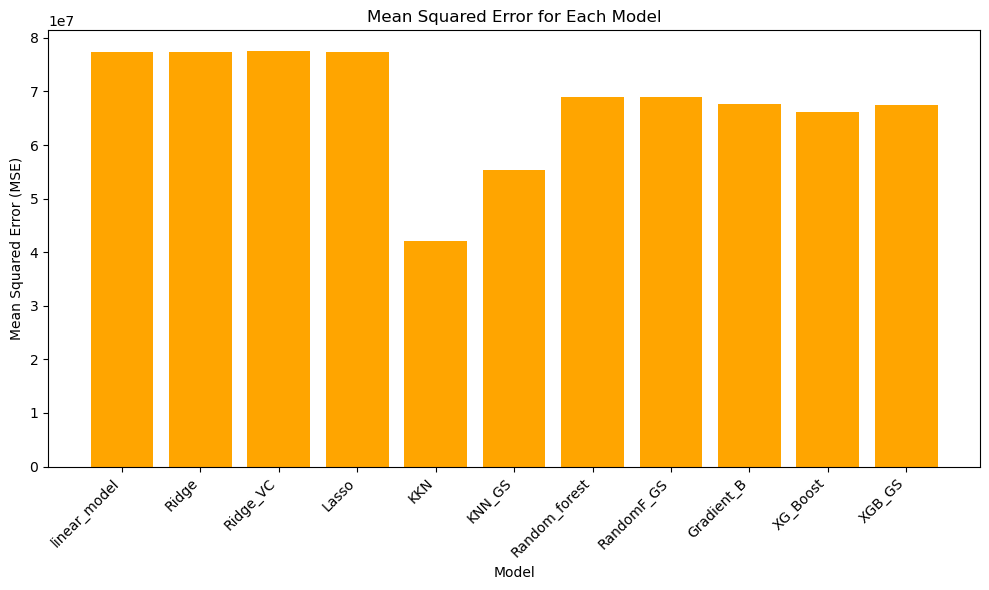

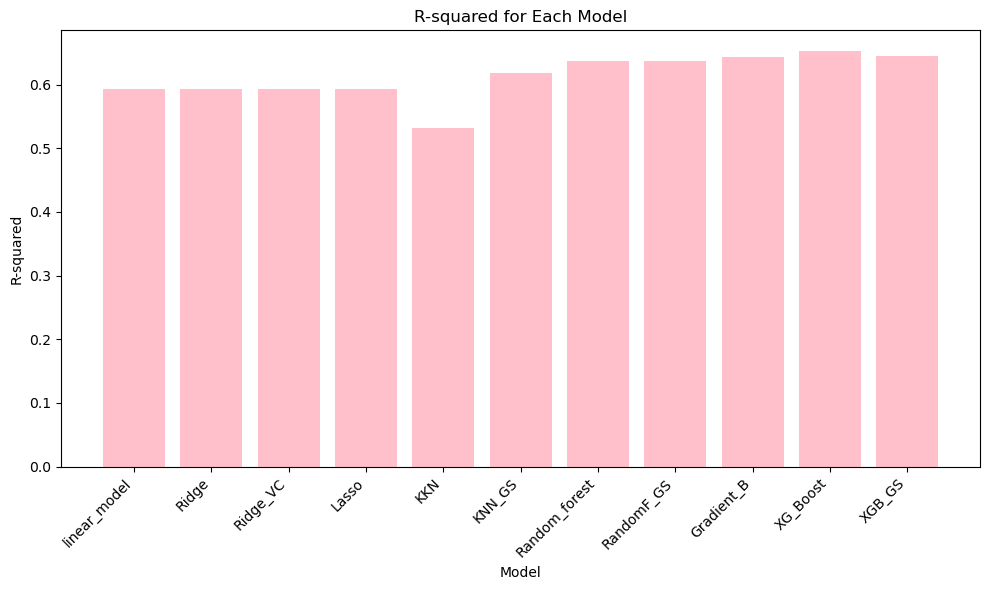

In [121]:
# Storing all models performance metrics in a DataFrame
models = ['linear_model', 'Ridge','Ridge_VC','Lasso','KKN','KNN_GS','Random_forest','RandomF_GS','Gradient_B','XG_Boost', 'XGB_GS']  # Replace with actual model names
mse_values = [77362774.94, 77370466.68, 77529067.62, 77366087.44, 42160461.43, 55265635.68, 68960174.80, 68960174.80, 67706403.50, 66087760.61, 67540328.26]  # Replace with actual MSE values
r2_values = [0.5933517958385074, 0.5933113651558912, 0.5924776982033093, 0.5933343840895651,0.5314437638443239,0.6177763546987296, 0.6375190618183141,0.6375190618183142,0.6441093611891296, 0.6526175646079968, 0.6449823158879611]  # Replace with actual R-squared values

# Plotting Mean Squared Error of each model
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='orange')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error for Each Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting r2 of each model
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='pink')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('R-squared for Each Model')
# Set the x-axis label alignment to center
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### Evaluation :
I discovered that XG Boost is the best model for accuracy after comparing the visualisation graphs of mean_squared_error and coefficient of determination (r-squared) for each model. Among all the models, the XG Boost model has the greatest R2 score and the lowest MSE.

--------------------------------------------------------------------------------------------------------------------------------

# Model prediction on Demo data

In [122]:
# Creating data set for prediction (CTC)

demo_data = pd.DataFrame({'College' : [2,1,3],
                          'City' : [1,0,1],
                          'Previous CTC' : [67000, 58000, 72000],
                          'Previous job change' : [4,2,3],
                          'Graduation Marks' : [75, 62, 59],
                          'EXP (Month)' : [12, 16, 24],
                          'Role_Executive' : [0, 1, 1],
                          'Role_Manager' : [1, 0, 1]
                         })

In [125]:
# Printing demo_Data

demo_data

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Executive,Role_Manager
0,2,1,67000,4,75,12,0,1
1,1,0,58000,2,62,16,1,0
2,3,1,72000,3,59,24,1,1


In [126]:
# Standardizing our demo data set 

scaler = preprocessing.StandardScaler().fit(demo_data)

In [127]:
# transfering scaled properties using scaler in demo_data_s object

demo_data_s = scaler.transform(demo_data)

In [128]:
# Printing scaled variable values

demo_data_s

array([[ 0.        ,  0.70710678,  0.23017414,  1.22474487,  1.39204455,
        -1.06904497, -1.41421356,  0.70710678],
       [-1.22474487, -1.41421356, -1.32350128, -1.22474487, -0.48001536,
        -0.26726124,  0.70710678, -1.41421356],
       [ 1.22474487,  0.70710678,  1.09332714,  0.        , -0.91202919,
         1.33630621,  0.70710678,  0.70710678]])

--------------------------------------------------------------------------------------------------------------------------------

### Prediciting salary using my best model - XG Boost

In [129]:
# Predicting salary using XG Boost and storing it in a variable.

predicted_ctc = xgb_reg.predict(demo_data_s)

In [133]:
# Printing predicted salary

print('Predicted CTC values are : \n', predicted_ctc)

Predicted CTC values are : 
 [84576.15  61011.617 76883.29 ]


--------------------------------------------------------------------------------------------------------------------------------

# 1. Your views about the problem statement?

The issue is well-defined, and it covers a real-world scenario in which a corporation wishes to establish employee compensation in a fair and competitive manner. The work entails regression modeling, which is an appropriate method for this situation. This is a standard regression job in which we attempt to predict a continuous target variable (salary) based on multiple employee traits and qualities. The organization needs to make sure that its pay packages are competitive and fair, taking into account elements including the employee's experience, credentials, and performance, as well as market trends.

# 2.  What will be your approach to solving this task?

**As per my opinion and as on the basis of what i have learned yet, i would like to follow the approach data importing, data preprocessing, model selection, model evaluation, Model finalization and Improvement Suggestions.**

#### Data Loading and Exploration:

* Load the provided employee data into a pandas DataFrame.

* Explore the dataset to understand its structure, features, and data types.

* Perform descriptive statistics to gain insights into the data.

#### Data Preprocessing:

* Convert the "College" field into a numerical data type by assigning weights to different college tiers (e.g., Tier 1, Tier 2, Tier 3).
* Convert the "City" field into a numerical data type (e.g., 0 for non-metro and 1 for metro cities).
* Create dummy variables for the "Role" field using one-hot encoding.
* Check for missing values and outliers

#### Model Selection:

* Choose and implement multiple regression & ensemble models, such as Linear Regression, Ridge Regression, Lasso Regression, KNN Random Forest, Gradient Boosting, and XG Boost.
* Evaluate each model's performance using appropriate metrics (e.g., Mean Squared Error, R-squared) on the training and test data.

#### Model Evaluation:

* Compare the metrics of each model to evaluate its performance.
* Based on the problem's unique needs and criteria, choose the model that gives the greatest performance.

#### Model finalization:

* Choose the model with the greatest performance on the assessment measures, taking into account characteristics such as accuracy, interpretability, and computational complexity.

#### Improvement Suggestions:

* Make ideas for increasing the model's performance, such as adding more features, gathering more data, experimenting with other modeling approaches, and employing ensemble methods.

# 3. What were the available ML model options you had to perform this task?

For regression tasks like predicting employee salaries, several machine learning models are available. Linear Regression, Ridge Regression, Lasso Regression, KNN, Random Forest, Gradient Boosting, XG Boost other regression techniques are among the ML model possibilities. 

Each model has its strengths and may perform differently based on the characteristics of the dataset. During model selection, we can experiment with different models and assess their performance using appropriate evaluation metrics. The goal is to choose the model that provides the most accurate salary predictions for the given dataset.

# 4. Which model’s performance is best and what could be the possible reason for that?


**I** considered one of the best models XGBoost for this regression task. Only XGBoost model explains the 65% variability on the test data. which is the highest accuracy then the other models. 

Here are some reasons why i think XGBoost might be the best choice for predicting employee salaries:

**Performance:** XGBoost is known for its exceptional predictive performance. It typically provides highly accurate predictions, making it suitable for regression tasks.

**Handling Non-linearity:** XGBoost can capture complex, non-linear relationships between features and the target variable. It's effective at modeling salary predictions, which can depend on a combination of factors in a non-linear manner.

**Regularization:** XGBoost offers built-in L1 (Lasso) and L2 (Ridge) regularization techniques, which help prevent overfitting. This is important when working with real-world data, as it can improve the model's generalization to new data.

**Speed and Scalability:** XGBoost is highly efficient and scalable, making it capable of handling larger datasets and providing fast predictions. This is important when dealing with a substantial number of employee records.

**Customizable:** XGBoost allows fine-grained control over hyperparameters, which can be tuned to optimize the model's performance.

**Ensemble Learning:** XGBoost can be used in ensemble learning, combining multiple models to improve prediction accuracy. By stacking or boosting multiple XGBoost models, you can potentially achieve even better results.



# 5. What steps can you take to improve this selected model’s performance even further?


* To fine-tune the model's performance, we can optimize its hyperparameters. Adjusting parameters such as learning rate, max depth, number of trees (n_estimators), subsample, and colsample_bytree are all part of this.

* Grid search or randomized search can be used to systematically explore different combinations of hyperparameters.

* We can experiment with several types of regularization, such as L1 (Lasso) and L2 (Ridge), to avoid overfitting.   

* Also Regularization can help the model generalize to new data more effectively.

* To acquire a better assessment of the model's performance, we can use more complex cross-validation approaches such as k-fold cross-validation. This can assist you in avoiding over- and under-fitting.

* Examine how outliers in the dataset were handled. we may either delete them, alter them, or develop a different model to forecast and correct outliers.

* We can collect extra data if possible to expand the size and variety of the collection. It is critical to ensure data quality, thus properly clean and preprocess the data.

* As new data becomes available, continue to update the model. Employee compensation patterns might shift over time, and retraining the model on a regular basis can help it adjust.